# 1. Quiz
> 붓꽃 데이터를 이용하여 최적화된 KNN 모델을 만드시오

# 2. 데이터 확인

## 2.1 데이터 읽기

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


## 2.2 데이터 정보 확인

In [2]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# 3. 모델 만들기

## 3.1 데이터 분류

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=10)

In [6]:
print('X_train.shape : ', X_train.shape)
print('y_train.shape : ', y_train.shape)
print('X_test.shape : ', X_test.shape)
print('y_test.shape : ', y_test.shape)

X_train.shape :  (120, 4)
y_train.shape :  (120,)
X_test.shape :  (30, 4)
y_test.shape :  (30,)


## 3.2 모델 생성

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

## 3.3 모델 정확도 평가하기

In [8]:
knn.score(X_test, y_test)

0.9666666666666667

In [9]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

# 4. 교차검증

In [12]:
from sklearn.model_selection import cross_val_score
import numpy as np 

scores = cross_val_score(knn, X=iris.data, y=iris.target, scoring='accuracy', cv=5)
print(scores)
print(np.mean(scores))

[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
0.9666666666666668


# 5. 모델 튜닝하기

In [13]:
knn = KNeighborsClassifier()

In [14]:
from sklearn.model_selection import GridSearchCV

def get_best_param(n_neighbors_list):
    params = {
        'n_neighbors':n_neighbors_list,
        'weights' :['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }

    grid_cv = GridSearchCV(knn, param_grid=params, scoring='accuracy', cv=5, verbose=1)
    grid_cv.fit(X_train, y_train)

    print('Best Score :', grid_cv.best_score_)
    print('Best Hyper Parameters :', grid_cv.best_params_)

In [15]:
n_neighbors_list = range(1, 100, 10)
get_best_param(n_neighbors_list)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Score : 0.95
Best Hyper Parameters : {'metric': 'manhattan', 'n_neighbors': 71, 'weights': 'distance'}


In [16]:
n_neighbors_list = range(51, 91, 5)
get_best_param(n_neighbors_list)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Score : 0.95
Best Hyper Parameters : {'metric': 'manhattan', 'n_neighbors': 66, 'weights': 'distance'}


In [17]:
n_neighbors_list = range(61, 71, 1)
get_best_param(n_neighbors_list)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Score : 0.95
Best Hyper Parameters : {'metric': 'manhattan', 'n_neighbors': 64, 'weights': 'distance'}


In [18]:
n_neighbors_list = range(1, 100, 1)
get_best_param(n_neighbors_list)

Fitting 5 folds for each of 594 candidates, totalling 2970 fits


C:\Users\sungc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sungc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sungc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Best Score : 0.95
Best Hyper Parameters : {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}


C:\Users\sungc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sungc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sungc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# 6. 최적화 적용

In [19]:
knn = KNeighborsClassifier(n_neighbors=8, metric='euclidean', weights='uniform')

knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

1.0


In [20]:
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib import rc, font_manager

font_name = font_manager.FontProperties(fname='c:/windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

In [21]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=10)

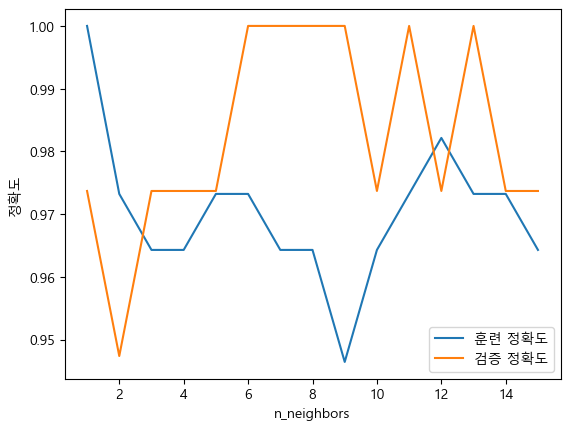

In [22]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 16)

for n_neibors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neibors)
    knn.fit(X_train, y_train)

    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='훈련 정확도')
plt.plot(neighbors_settings, test_accuracy, label='검증 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

In [23]:
import joblib 

save_model_filepath = 'model/iris_knn_v1.pkl'
joblib.dump(knn, save_model_filepath)

['model/iris_knn_v1.pkl']

In [24]:
load_knn = joblib.load(save_model_filepath)
load_knn.predict(X_test)

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2])